# Medicare HHA

For this Analysis I just included 1)services offered 2)Survey Results 3)Year Certified

In [44]:
# Dependencies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from time import time

from IPython.display import display # Allows the use of display() for displaying DataFrames

import seaborn as sns

# Import supplementary visualization code visuals.py from project root folder 
# Code support from https://github.com/booleanhunter/ML-supervised-learning/tree/master/game-of-wines
#import visuals as vs
#from vpython import visual as vs

# Import train_test_split
from sklearn.model_selection import train_test_split

# Pretty display for notebooks
%matplotlib inline

In [45]:
# Import data
hha_file = "C:/Users/Joseph/Downloads/ML-Final-Project-master (2)/ML-Final-Project-master/datasets/Survey/Surveyfirst_hha_df TH.csv"
hha_df = pd.read_csv(hha_file)
hha_df.head()

,Year,Provider ID,City,State,Zip Code,Average HCC Score,Offers Nursing Care Services,Offers Physical Therapy Services,Offers Occupational Therapy Services,Offers Speech Pathology Services,Offers Medical Social Services,Offers Home Health Aide Services,Year Certified,Star rating: communicated well with them,"Star rating: discussed medicines, pain, home safety",Star rating: gave care in a professional way,Star rating: overall care,Summary Star Rating
0,2016,187070,OWENTON,KY,40359,2.46,Yes,Yes,Yes,No,No,Yes,1976,5,5,5,5,5
1,2016,187073,FRANKFORT,KY,40601,2.07,Yes,Yes,Yes,Yes,No,Yes,1977,4,2,3,3,3
2,2016,237018,0,MI,49783,1.98,Yes,Yes,Yes,Yes,Yes,Yes,1966,5,2,3,3,3
3,2016,267057,CROCKER,MO,65452,2.08,Yes,Yes,Yes,Yes,No,Yes,1975,4,3,3,3,3
4,2016,277012,BILLINGS,MT,59101,2.41,Yes,Yes,Yes,Yes,Yes,Yes,1967,4,2,4,3,3


In [46]:
hha_df.columns

Index(['Year', 'Provider ID', 'City', 'State', 'Zip Code', 'Average HCC Score',
       'Offers Nursing Care Services', 'Offers Physical Therapy Services',
       'Offers Occupational Therapy Services',
       'Offers Speech Pathology Services', 'Offers Medical Social Services',
       'Offers Home Health Aide Services', 'Year Certified',
       'Star rating: communicated well with them',
       'Star rating: discussed medicines, pain, home safety',
       'Star rating: gave care in a professional way',
       'Star rating: overall care', 'Summary Star Rating'],
      dtype='object')

In [47]:
cols_to_transform = ['Offers Nursing Care Services', 'Offers Physical Therapy Services', 'Offers Occupational Therapy Services',
                     'Offers Speech Pathology Services', 'Offers Medical Social Services', 'Offers Home Health Aide Services'] 
hha_df = pd.get_dummies(hha_df, columns = cols_to_transform )

In [48]:
hha_df.to_csv('C:/Users/Joseph/Downloads/ML-Final-Project-master (2)/ML-Final-Project-master/datasets/Survey/2.csv')

In [49]:
# convert to numeric
hha_df[['Zip Code', 'Average HCC Score', 'Year Certified', 'Star rating: communicated well with them',
        'Star rating: discussed medicines, pain, home safety', 'Star rating: gave care in a professional way',
        'Star rating: overall care', 'Summary Star Rating']] = hha_df[['Zip Code', 'Average HCC Score',
        'Year Certified', 'Star rating: communicated well with them',
        'Star rating: discussed medicines, pain, home safety', 'Star rating: gave care in a professional way',
        'Star rating: overall care', 'Summary Star Rating']].apply(pd.to_numeric)

In [51]:
hha_df.to_csv('C:/Users/Joseph/Downloads/ML-Final-Project-master (2)/ML-Final-Project-master/datasets/3.csv')

In [52]:
# Get column names
# hha_columns = list(hha_df)
# hha_columns

# Get info about Avg HCC Score
hhc_describe = hha_df["Average HCC Score"].describe()
hhc_describe

count    16712.000000
mean         2.169622
std          0.320200
min          0.810000
25%          1.970000
50%          2.150000
75%          2.350000
max          5.070000
Name: Average HCC Score, dtype: float64

In [53]:
# remove NaN rows

clean_hha_df = hha_df.dropna()

In [54]:
# Get info about cleaned Avg HCC Score

clean_hhc_describe = clean_hha_df["Average HCC Score"].describe()
clean_hhc_describe

count    16712.000000
mean         2.169622
std          0.320200
min          0.810000
25%          1.970000
50%          2.150000
75%          2.350000
max          5.070000
Name: Average HCC Score, dtype: float64

In [55]:
# Cleaner - replace astericks with 0

cleaner_hha_df = clean_hha_df.replace('^\*+$', 0, regex=True)
cleaner_hha_df = clean_hha_df.replace(' * ', 0, regex=True)


## Data prep, transforming, splitting

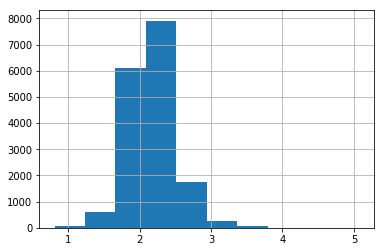

In [56]:
# Histogram of HCC

cleaner_hha_df["Average HCC Score"].hist()

In [58]:
#Defining the splits for HCC scores. 0-1.08 will be low risk, 1.09+ will be high risk.
bins = [0, 1.5, 3, 4.5, 6]

#1 for low risk, 2 for high risk
risk_labels=["low risk", "high risk level 1", "high risk level 2", "high risk level 3"]

cleaner_hha_df['risk_categorical'] = pd.cut(cleaner_hha_df['Average HCC Score'], bins=bins, labels=risk_labels, include_lowest=True)

# Split the data into features and target label
risk_raw = cleaner_hha_df['risk_categorical']
features_raw = cleaner_hha_df.drop(['Average HCC Score', 'risk_categorical', 'Provider ID', \
                                    'City', 'State',], axis = 1)


cleaner_hha_df.to_csv("C:/Users/Joseph/Downloads/ML-Final-Project-master (2)/ML-Final-Project-master/datasets/Survey/4.csv")



## Training & Testing

In [59]:
# Split the 'features' and 'risk' data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features_raw, risk_raw, test_size = 0.2, random_state = 0)

# Show the results of the split
print("Training set has {} samples.".format(X_train.shape[0]))
print("Testing set has {} samples.".format(X_test.shape[0]))

Training set has 13369 samples.
Testing set has 3343 samples.


In [60]:
# Import two classification metrics from sklearn - fbeta score and accuracy score
from sklearn.metrics import fbeta_score
from sklearn.metrics import accuracy_score

def train_predict_evaluate(learner, sample_size, X_train, y_train, X_test, y_test):
    '''
    inputs:
    - learner: the learning algorithm to be trained/predicted on
    - sample_size: the size of samples to be drawn from the training set
    - X_train: features training set
    - y_train: risk training set
    - x_test: features test set
    - y_test: risk test set
    '''
    
    results = {}
    
    """
    Fit/train the learner to the training data using slicing with sample_size
    using .fit(training_features[:], training_labels[:])
    """
    
    start = time()
    learner = learner.fit(X_train[:sample_size], y_train[:sample_size])
    end = time()
    
#     Calculate training time
    results["train_time"] = end - start
    
    """
    Get predictions on the first 300 training samples (X_train)
    and predictions on the test set (X_test) using .predict()
    """
    
    start = time()
    predictions_train = learner.predict(X_train)
    predictions_test = learner.predict(X_test)
    end = time()
    
    # Calculate the total prediction time
    results["pred_time"] = end - start
    
    # Compute accuracy on the training samples
    results["acc_train"] = accuracy_score(y_train, predictions_train)
    
    # Compute accuracy on test set, using accuracy_score()
    results["acc_test"] = accuracy_score(y_test, predictions_test)
    
    # Compute f1-score on the ftraining samples, using fbeta_score()
    results["f_train"] = fbeta_score(y_train, predictions_train, beta=1, average="micro")
    
    # Compute f1-score on test set, which is y_test
    results["f_test"] = fbeta_score(y_test, predictions_test, beta=1, average="micro")
    
    # Success
    print("{} trained on {} samples".format(learner.__class__.__name__, sample_size))
    
    # Return results
    return results

## Model Validation

In [61]:
# Import any three supervised learning classification models from sklearn
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
#from sklearn.linear_model import LogisticRegression

# Initialize the three models
clf_A = GaussianNB()
clf_B = DecisionTreeClassifier(max_depth=None, random_state=None)
clf_C = RandomForestClassifier(max_depth=None, random_state=None)

# Calculate the number of samples for 1%, 10%, and 100% of the training data
# HINT: samples_100 is the entire training set i.e. len(y_train)
# HINT: samples_10 is 10% of samples_100
# HINT: samples_1 is 1% of samples_100
samples_100 = len(y_train)
samples_10 = int(len(y_train)*10/100)
samples_1 = int(len(y_train)*1/100)

# Collect results on the learners
results = {}
for clf in [clf_A, clf_B, clf_C]:
    clf_name = clf.__class__.__name__
    results[clf_name] = {}
    for i, samples in enumerate([samples_1, samples_10, samples_100]):
        results[clf_name][i] = train_predict_evaluate(clf, samples, X_train, y_train, X_test, y_test)

    #print(results)

# Run metrics visualization for the three supervised learning models chosen
# vs.visualize_classification_performance(results)

print(clf_A, results[clf_name][0])
print(clf_B, results[clf_name][1])
print(clf_C, results[clf_name][2])

GaussianNB trained on 133 samples
GaussianNB trained on 1336 samples
GaussianNB trained on 13369 samples
DecisionTreeClassifier trained on 133 samples
DecisionTreeClassifier trained on 1336 samples
DecisionTreeClassifier trained on 13369 samples


C:\Users\Joseph\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestClassifier trained on 133 samples
RandomForestClassifier trained on 1336 samples
RandomForestClassifier trained on 13369 samples
GaussianNB(priors=None, var_smoothing=1e-09) {'train_time': 0.013964176177978516, 'pred_time': 0.016956567764282227, 'acc_train': 0.9703792355449173, 'acc_test': 0.9697876159138499, 'f_train': 0.9703792355449173, 'f_test': 0.9697876159138499}
DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best') {'train_time': 0.01798248291015625, 'pred_time': 0.01991724967956543, 'acc_train': 0.972922432493081, 'acc_test': 0.9712832784923722, 'f_train': 0.972922432493081, 'f_test': 0.9712832784923722}
RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gin

In [62]:
results

{'GaussianNB': {0: {'train_time': 0.00498652458190918,
   'pred_time': 0.0299222469329834,
   'acc_train': 0.9219088937093276,
   'acc_test': 0.9228238109482501,
   'f_train': 0.9219088937093276,
   'f_test': 0.9228238109482501},
  1: {'train_time': 0.003997802734375,
   'pred_time': 0.022933006286621094,
   'acc_train': 0.9478644625626449,
   'acc_test': 0.9440622195632665,
   'f_train': 0.947864462562645,
   'f_test': 0.9440622195632665},
  2: {'train_time': 0.020913124084472656,
   'pred_time': 0.02094864845275879,
   'acc_train': 0.9574388510733787,
   'acc_test': 0.9560275201914448,
   'f_train': 0.9574388510733787,
   'f_test': 0.9560275201914448}},
 'DecisionTreeClassifier': {0: {'train_time': 0.0029637813568115234,
   'pred_time': 0.0020241737365722656,
   'acc_train': 0.9290896850923779,
   'acc_test': 0.9309003888722704,
   'f_train': 0.9290896850923779,
   'f_test': 0.9309003888722706},
  1: {'train_time': 0.007980108261108398,
   'pred_time': 0.0049860477447509766,
   'acc_

In [63]:
results_df = pd.DataFrame(results)

In [65]:
results_df.to_csv("C:/Users/Joseph/Downloads/ML-Final-Project-master (2)/ML-Final-Project-master/datasets/Survey/TimResults.csv")

In [66]:
# Define train and test values for accuracy and f-score

gnb_acc_train = results['GaussianNB'][2]['acc_train']
gnb_acc_test = results['GaussianNB'][2]['acc_test']

dtc_acc_train = results['DecisionTreeClassifier'][2]['acc_train']
dtc_acc_test = results['DecisionTreeClassifier'][2]['acc_test']

rfc_acc_train = results['RandomForestClassifier'][2]['acc_train']
rfc_acc_test = results['RandomForestClassifier'][2]['acc_test']

gnb_f_train = results['GaussianNB'][2]['f_train']
gnb_f_test = results['GaussianNB'][2]['f_test']

dtc_f_train = results['DecisionTreeClassifier'][2]['f_train']
dtc_f_test = results['DecisionTreeClassifier'][2]['f_test']

rfc_f_train = results['RandomForestClassifier'][2]['f_train']
rfc_f_test = results['RandomForestClassifier'][2]['f_test']

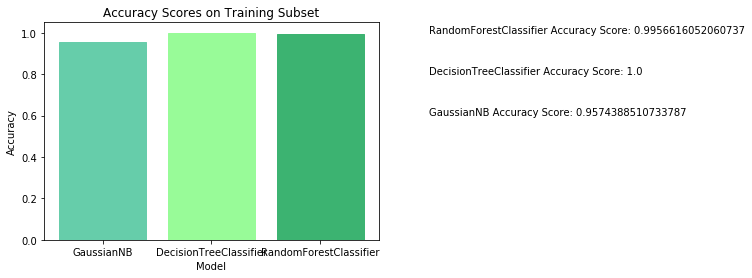

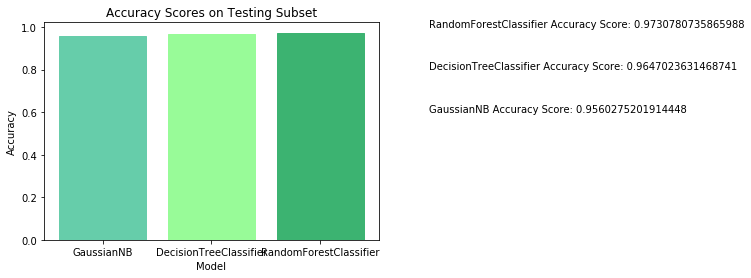

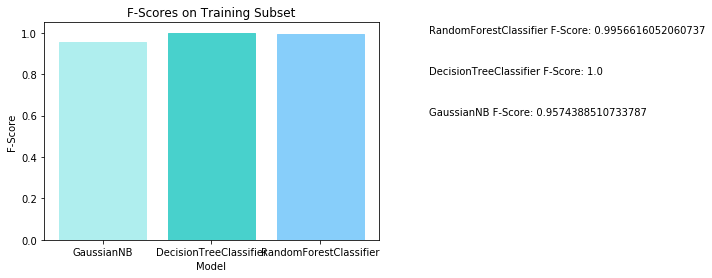

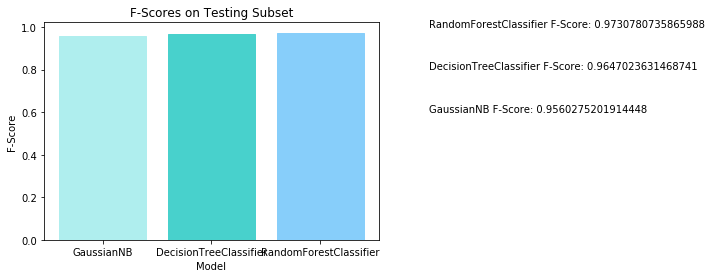

In [67]:
# Plot the train & test values for accuracy

# green colors: #66CDAA, #98FB98, #3CB371
# blue colors: #AFEEEE, #48D1CC, #87CEFA

acc_train_x = [1,2,3]
acc_train_y = [gnb_acc_train, dtc_acc_train, rfc_acc_train]
acc_train_labels = ['GaussianNB', 'DecisionTreeClassifier', 'RandomForestClassifier']

acc_train_bar = plt.bar(acc_train_x, acc_train_y)
acc_train_bar[0].set_color("#66CDAA")
acc_train_bar[1].set_color("#98FB98")
acc_train_bar[2].set_color("#3CB371")
plt.xticks(acc_train_x, acc_train_labels)
plt.title("Accuracy Scores on Training Subset")
plt.ylabel('Accuracy')
plt.xlabel('Model')
plt.text(4, 0.6, f"GaussianNB Accuracy Score: {gnb_acc_train}")
plt.text(4, 0.8, f"DecisionTreeClassifier Accuracy Score: {dtc_acc_train}")
plt.text(4, 1, f"RandomForestClassifier Accuracy Score: {rfc_acc_train}")
plt.show()


acc_test_x = [1,2,3]
acc_test_y = [gnb_acc_test, dtc_acc_test, rfc_acc_test]
acc_test_labels = ['GaussianNB', 'DecisionTreeClassifier', 'RandomForestClassifier']

acc_test_bar = plt.bar(acc_test_x, acc_test_y)
acc_test_bar[0].set_color("#66CDAA")
acc_test_bar[1].set_color("#98FB98")
acc_test_bar[2].set_color("#3CB371")
plt.xticks(acc_test_x, acc_test_labels)
plt.title("Accuracy Scores on Testing Subset")
plt.ylabel('Accuracy')
plt.xlabel('Model')
plt.text(4, 0.6, f"GaussianNB Accuracy Score: {gnb_acc_test}")
plt.text(4, 0.8, f"DecisionTreeClassifier Accuracy Score: {dtc_acc_test}")
plt.text(4, 1, f"RandomForestClassifier Accuracy Score: {rfc_acc_test}")
plt.show()

# Plot the train & test values for f-score

fscore_train_x = [1,2,3]
fscore_train_y = [gnb_f_train, dtc_f_train, rfc_f_train]
fscore_train_labels = ['GaussianNB', 'DecisionTreeClassifier', 'RandomForestClassifier']

fscore_train_bar = plt.bar(fscore_train_x, fscore_train_y)
fscore_train_bar[0].set_color("#AFEEEE")
fscore_train_bar[1].set_color("#48D1CC")
fscore_train_bar[2].set_color("#87CEFA")
plt.xticks(fscore_train_x, fscore_train_labels)
plt.title("F-Scores on Training Subset")
plt.ylabel('F-Score')
plt.xlabel('Model')
plt.text(4, 0.6, f"GaussianNB F-Score: {gnb_f_train}")
plt.text(4, 0.8, f"DecisionTreeClassifier F-Score: {dtc_f_train}")
plt.text(4, 1, f"RandomForestClassifier F-Score: {rfc_f_train}")
plt.show()

fscore_test_x = [1,2,3]
fscore_test_y = [gnb_f_test, dtc_f_test, rfc_f_test]
fscore_test_labels = ['GaussianNB', 'DecisionTreeClassifier', 'RandomForestClassifier']

fscore_test_bar = plt.bar(fscore_test_x, fscore_test_y)
fscore_test_bar[0].set_color("#AFEEEE")
fscore_test_bar[1].set_color("#48D1CC")
fscore_test_bar[2].set_color("#87CEFA")
plt.xticks(fscore_test_x, fscore_test_labels)
plt.title("F-Scores on Testing Subset")
plt.ylabel('F-Score')
plt.xlabel('Model')
plt.text(4, 0.6, f"GaussianNB F-Score: {gnb_f_test}")
plt.text(4, 0.8, f"DecisionTreeClassifier F-Score: {dtc_f_test}")
plt.text(4, 1, f"RandomForestClassifier F-Score: {rfc_f_test}")
plt.show()

In [68]:
importances

array([0.00413319, 0.02043862, 0.02189107, 0.02253128, 0.02241259,
       0.03155593, 0.0235975 , 0.01587562, 0.00793658, 0.02510775,
       0.01168661, 0.02467236, 0.0151879 , 0.02454221, 0.02483636,
       0.01950032, 0.02109517, 0.02038555, 0.03683058, 0.01234269,
       0.00373705, 0.01440844, 0.00060428, 0.02177705, 0.04599167,
       0.02031595, 0.02779898, 0.08192113, 0.08565994, 0.03033917,
       0.02361832, 0.04459278, 0.012734  , 0.01499156, 0.0210002 ,
       0.02550013, 0.02440639, 0.03721211, 0.01744065, 0.00747163,
       0.00461236, 0.00739668, 0.00924295, 0.00348097, 0.        ,
       0.        , 0.00021074, 0.00019213, 0.00013762, 0.00103662,
       0.00093639, 0.00026321, 0.00198136, 0.00133649, 0.00109117])

In [71]:
# Import a supervised learning model that has 'feature_importances_'
model = RandomForestClassifier(max_depth=None, random_state=None)

# Train the supervised model on the training set using .fit(X_train, y_train)
model = model.fit(X_train, y_train)

# Extract the feature importances using .feature_importances_ 
importances = model.feature_importances_
print(X_train.columns)
print(importances)

# Plot
# vs.feature_plot(importances, X_train, y_train)

Index(['Year', 'Zip Code', 'Year Certified',
       'Star rating: communicated well with them',
       'Star rating: discussed medicines, pain, home safety',
       'Star rating: gave care in a professional way',
       'Star rating: overall care', 'Summary Star Rating',
       'Offers Nursing Care Services_Yes',
       'Offers Physical Therapy Services_No',
       'Offers Physical Therapy Services_Yes',
       'Offers Occupational Therapy Services_No',
       'Offers Occupational Therapy Services_Yes',
       'Offers Speech Pathology Services_No',
       'Offers Speech Pathology Services_Yes',
       'Offers Medical Social Services_No',
       'Offers Medical Social Services_Yes',
       'Offers Home Health Aide Services_No',
       'Offers Home Health Aide Services_Yes'],
      dtype='object')
[1.88128549e-01 3.57436449e-01 1.75795706e-01 3.85555051e-02
 6.73179826e-02 5.21877099e-02 4.41520129e-02 3.00182615e-02
 0.00000000e+00 0.00000000e+00 2.59202081e-04 2.60301802e-03
 4.0660608

C:\Users\Joseph\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18],
 <a list of 19 Text xticklabel objects>)

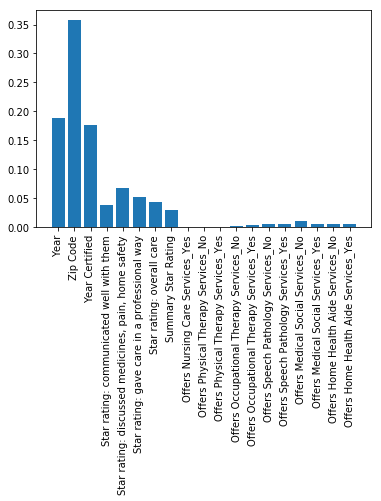

In [73]:

important_test_bar = plt.bar(X_train.columns, importances)
plt.xticks(rotation='vertical')
